In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import time
# from timing import time_it as tt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
def loadData():
	'''Load data logisticX.csv and logisticY.csv
		Return type: dict
		{'X': X, 'Y' : Y}
	'''
	X = np.array(pd.read_csv('logisticX.csv', header=None))
	Y = np.array(pd.read_csv('logisticY.csv', header=None))

	return {'X' : X, 'Y': Y}

In [15]:
def normalize(V):
	'''Normalizes 1-D numpy vector
		(X - mean) / (max - min)
	'''
	return (V - np.mean(V, axis=0)) / np.std(V, axis=0)


In [16]:
def designMatrix(X):
	'''
	X:
		[x_1_0, x_1_0, ...x_i_0.. x_n_0 ]
		[x_1_1, x_1_1, ...x_i_1.. x_n_1 ]
		[       .......                 ]
		[x_1_m, x_1_m, ...x_i_m.. x_n_m ]

	return:
		[1 x_1_0, x_1_0, ...x_i_0.. x_n_0 ]
		[1 x_1_1, x_1_1, ...x_i_1.. x_n_1 ]
		[         .......                 ]
		[1 x_1_m, x_1_m, ...x_i_m.. x_n_m ]
	'''
	nrow = len(X)
	return np.append(np.ones((nrow, 1)), X, axis=1)

In [17]:
def sigmoid(X, theta):
    return 1 / (1 + np.exp(-1 * np.dot(X, theta)))

In [18]:
def hessian(X, theta):
    sigm = sigmoid(X, theta)
    sigm1 = (1 - sigm)
    a = sigm * sigm1
    D = np.diag(a.T[0])
#     print(sigm.shape)
#     print(sigm1.shape)
    return -1 *(X.T @ D @ X)
 

In [19]:
def deltaLL(X, Y, theta):
   return (X.T @ (Y - sigmoid(X, theta)))

In [20]:
def converge(theta1, theta2):
    if (abs(theta1 - theta2).all() < 1e-15):
        return True
    else:
        return False

In [77]:
def newton(X, Y):
    m = X.shape[1]
    theta_prev = np.ones((m,1))
    theta_current = np.zeros((m,1))
    while(not converge(theta_current, theta_prev)):
        theta_prev = theta_current.copy()
        H = hessian(X, theta_prev)
        d_ll_theta = deltaLL(X, Y, theta_prev)
        if np.linalg.det(H) == 0:
            theta = theta_prev - (np.linalg.pinv(H) @ d_ll_theta)
        else:
            theta = theta_prev - (np.linalg.inv(H) @ d_ll_theta)
        theta_current = theta.copy()
    return theta_current
    

In [78]:
X = designMatrix(normalize(loadData()['X']))
Y = loadData()['Y']
m = X.shape[1]


In [79]:
theta = np.zeros((m,1))

In [80]:
H = hessian(X, theta)

In [190]:
theta_opt = newton(X, Y)

In [191]:
theta_opt

array([[ 0.40125316],
       [ 2.5885477 ],
       [-2.72558849]])

In [82]:
X[:,1]

array([-0.55136993, -0.70429721, -1.39690538, -1.14109148, -1.28408644,
       -0.71938522, -1.34830528, -0.64129147, -1.49531866, -0.40071723,
       -0.97428929, -2.41007702, -0.70270501, -0.12746492,  0.11591463,
       -0.67336299,  0.27900168, -0.32095546,  0.75643502, -0.64561317,
       -0.48275358, -0.5160382 , -0.42338716, -0.21458116, -0.03640609,
       -1.59896348, -1.83362383,  0.16921551, -0.11214945, -1.49251336,
       -0.88565668,  0.55991172, -1.72838681, -0.59761963, -1.90239182,
       -0.71627664, -0.61384493, -0.98679946, -0.13027023, -0.95184682,
        0.0557142 , -0.01312961, -1.05799366, -0.64978322, -0.68784445,
       -0.11169453,  0.09968933, -0.24339244, -0.82704845, -1.52329594,
        0.09150086, -0.93099654, -0.10767612,  0.88699564,  0.08816481,
        1.38944932,  0.24359412,  0.84430945,  0.21432792,  1.14895089,
       -0.57949885,  1.91745405,  0.50175841,  0.56324776, -0.41671508,
        0.6669684 ,  0.61472898, -0.24900306,  1.12203509,  2.19

In [45]:
x1 =  X[:,1]

In [48]:
x2 =  X[:,2]

In [166]:
def getXData(X, Y, val = 0):
    m = X.shape[1]
    new_x = np.empty((0, m))
    for index, row in enumerate(Y):
        if row[0] == val:
            new_x = np.append(new_x, X[index])
    new_x = new_x.reshape((-1,m))   
    return new_x
            
            
    
    

In [156]:
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [169]:
getXData(X, Y, val=0).shape

(50, 3)

In [138]:
 new_x = np.empty((0, 3))

In [111]:
np.append(new_x, X[0])

array([ 1.        , -0.55136993, -0.22518431])

In [177]:
xx0 = getXData(X, Y, val=0)
x10 = xx0[:,1]
x20 = xx0[:,2]

xx1 = getXData(X, Y, val=1)
x11 = xx1[:,1]
x21 = xx1[:,2]

In [178]:
# xx1 = getXData(X, Y, val=1)

In [186]:
xx0[:,1]
X[:,1]
theta_opt[0][0] + theta_opt[1][0] * X[:,1] 

array([-1.02599421, -1.42185376, -3.21470303, -2.55251656, -2.92266584,
       -1.46090981, -3.08889938, -1.25876041, -3.46945053, -0.6360225 ,
       -2.12074114, -5.83734615, -1.41773226,  0.07130413,  0.70130371,
       -1.34177904,  1.12346231, -0.42955535,  2.3593213 , -1.26994732,
       -0.8483775 , -0.93453632, -0.69470471, -0.1542004 ,  0.30701425,
       -3.73774007, -4.34516957,  0.83927558,  0.11094896, -3.46218885,
       -1.89131139,  1.85061136, -4.07275854, -1.14571375, -4.5231788 ,
       -1.45286308, -1.18771373, -2.1531243 ,  0.06404245, -2.06264772,
        0.54547204,  0.36726655, -2.3374139 , -1.2807417 , -1.379265  ,
        0.11212653,  0.65930374, -0.22877978, -1.73960121, -3.54187104,
        0.63810749, -2.0086758 ,  0.12252839,  2.69728369,  0.62947198,
        3.99790899,  1.03180816,  2.58678844,  0.9560512 ,  3.37536735,
       -1.09880724,  5.36467444,  1.70007874,  1.85924686, -0.67743369,
        2.12773267,  1.99250846, -0.24330314,  3.3056945 ,  6.09

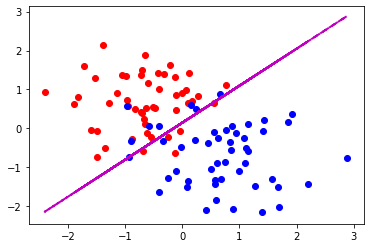

In [189]:
#todo filter x1, x2 wrt 0 and 1 y
plt.scatter(x10, x20,color="r")
plt.scatter(x11, x21,color="b")

yy = -(theta_opt[0][0] + theta_opt[1][0]*X[:,1]) / theta_opt[2][0]
plt.plot(X[:,1], yy,'--', linewidth=2, color="m")

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    